In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#1.Import dataset and display first 5 rows
df=pd.read_csv("TvMarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [9]:
#2.Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [51]:
3#Check the shape of the Data Frame (rows, columns)
df.shape

(200, 2)

In [52]:
df.shape[0]

200

In [53]:
df.shape[1]

2

In [54]:

#4.Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [55]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


<Axes: xlabel='TV', ylabel='Sales'>

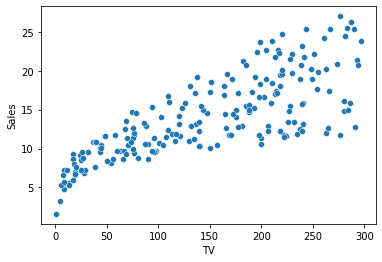

In [56]:
5#Visualize the relationship between the features and the dependent variableusing scatterplots
import seaborn as sns
sns.scatterplot(x=df['TV'],y=df['Sales'])

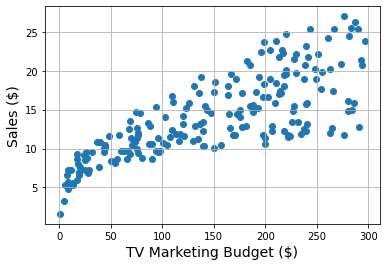

In [57]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV Marketing Budget ($)', fontsize=14)  # X-axis label
plt.ylabel('Sales ($)', fontsize=14)  # Y-axis label
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

    



In [65]:
#6. Prepare X (Feature Variables) and y (Response Variable)
x=df[['TV']].values
y=df['Sales'].values
print(x)
print(y)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [66]:
#7. Split Data into Training and Testing Sets (70%-Train, 30%-Test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [67]:
#8. Print the shape of train data and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train.shape[0])

(140, 1)
(60, 1)
(140,)
(60,)
140


In [68]:
#9. Perform Linear Regression (on train data) without using any library andprint the coefficients values
x_train_b=np.c_[np.ones(x_train.shape[0]),x_train]
beta_hat=np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
intercept,coefficient=beta_hat[0],beta_hat[1]
print("Intercept:", intercept)
print("Coefficient:", coefficient)

Intercept: 7.310810165411691
Coefficient: 0.04581434217189617


In [69]:
10#Create the Model Using Calculated Coefficients and Make Predictions on the Testing Set
x_test_b=np.c_[np.ones(x_test.shape[0]),x_test]
y_pred_manual=x_test_b.dot(beta_hat)

In [70]:
#11.11. Perform Linear Regression using library(sklearn)
#11.from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)  # Make sure to execute this line


LinearRegression()

In [73]:
#12. Print the intercept and coefficients
print("intercept:",model.intercept_)
print("coefficient",model.coef_[0])

intercept: 7.310810165411681
coefficient 0.04581434217189623


In [75]:
#13. Make Predictions on the Testing Set - y_pred
y_pred=model.predict(x_test)
y_pred

array([10.48116264,  9.60152727, 11.4524267 , 20.58322509, 15.1084112 ,
        9.8855762 ,  7.70939494, 18.31083372,  8.40119151, 16.36372418,
       19.28209777, 11.3058208 , 14.48533615, 15.91474363, 10.81102591,
       12.81769409, 19.47909945,  7.3428802 , 10.73314153, 17.08759078,
       20.48701497, 13.73856237, 15.33290148, 13.34455903,  9.76187747,
       12.95055569, 14.89766523, 16.70275031, 17.57322281,  8.46075015,
       10.41702256, 16.42328282, 20.17089601, 18.38413667,  7.91555948,
        8.16753836, 10.04134496, 15.59404323, 10.44451117,  8.45616872,
        9.00135939,  8.75396194, 13.85767966, 16.91349628, 17.17921947,
       12.01594311,  7.70481351,  8.08507255, 13.06967298, 12.10299036,
       12.34122494, 17.82520169, 18.93849021, 15.78188203,  9.35871126,
       10.16504368, 20.72983099, 15.21378419, 16.58821446,  7.64525486])

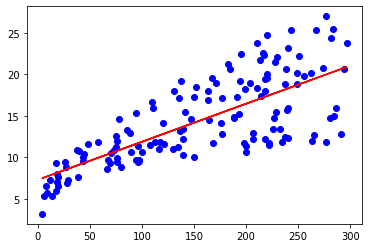

In [76]:
#14. Plot Train Data and the Model
plt.scatter(x_train,y_train,color='blue',label="Training Data")
plt.plot(x_train,model.predict(x_train),color='red',label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

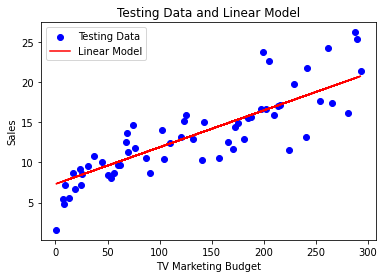

In [82]:
15# Plot Test Data and the Model
plt.scatter(x_test,y_test,color='blue',label="Testing Data")
plt.plot(x_test,model.predict(x_test),color='red',label="Linear Model")
plt.title('Testing Data and Linear Model')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [85]:
#16. Print Mean Squared Error and R-Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)
print(mse)
print(r_squared)

7.497479593464674
0.725606346597073


In [89]:
#17. Calculate and Print R-Squared and Adjusted R-Squared Values Without Any Library

# Calculate R-squared manually
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared_manual = 1 - (ss_residual / ss_total)

# Calculate Adjusted R-squared
n = x_test.shape[0]  # number of observations
p = x_test.shape[1]  # number of features
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("R Squared (manual):", r_squared_manual)
print("Adjusted R Squared:", adjusted_r_squared)

R Squared (manual): 0.725606346597073
Adjusted R Squared: 0.7208754215384019


In [92]:
ss_res=np.sum((y_test-y_pred)**2)
ss_total=np.sum((y_test-np.mean(y_test))**2)
r_squared_manual=1-(ss_res/ss_total)
r_squared_manual

0.725606346597073

In [96]:
n=x_test.shape[0]
p=x_test.shape[1]
ad_rs=1-(1-r_squared_manual)*(n-p)/(n-p-1)
ad_rs

0.7208754215384019